In [17]:
# Import Dependencies
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [18]:
# Import Dependencies
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [19]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [20]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [21]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with = engine)

In [22]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [23]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [24]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [25]:
# Find the most recent date in the data set.
most_recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(most_recent_date)

('2017-08-23',)


Text(0, 0.5, 'Inches')

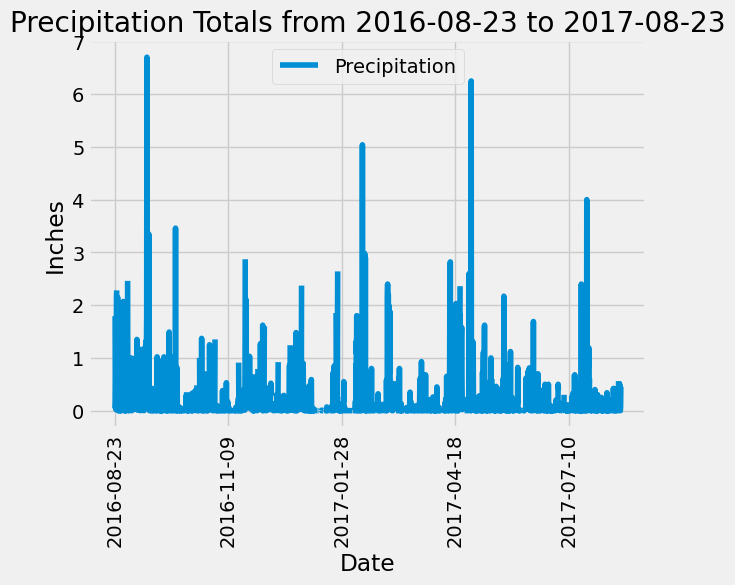

In [26]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_prior = (dt.datetime.strptime(most_recent_date[0], "%Y-%m-%d") - dt.timedelta(days = 365)).strftime("%Y-%m-%d")
# Note: one_year_prior is: 2016-08-23 (yyyy-mm-dd)

# Perform a query to retrieve the data and precipitation scores
measurement_cols = (measurement.date, measurement.prcp)
prcp_scores = session.query(*measurement_cols).filter(measurement.date >= one_year_prior).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_scores, columns = ["Date", "Precipitation"])

# Sort the dataframe by date
prcp_df.set_index("Date", inplace = True)
prcp_df = prcp_df.sort_index()

# Use Pandas Plotting with Matplotlib to plot the data
ax = prcp_df.plot(rot = 90)
ax.set_title (f"Precipitation Totals from 2016-08-23 to 2017-08-23")
ax.set_ylabel("Inches")

In [27]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [28]:
# Design a query to calculate the total number of stations in the dataset
station_count = session.query(func.count(station.id)).all()
station_count

[(9,)]

In [29]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_highest_avg_temperatures = session.query(func.min(measurement.tobs),\
                                                func.max(measurement.tobs),\
                                                func.avg(measurement.tobs)).\
                                                filter(measurement.station == "USC00519281").all()
lowest_highest_avg_temperatures

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

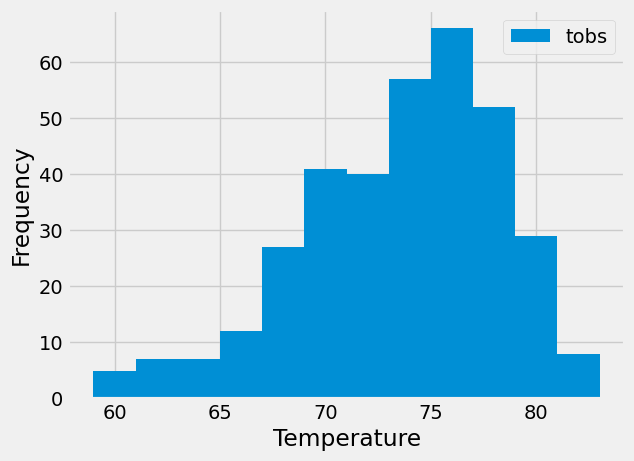

In [31]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
USC00519281_data = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == "USC00519281").\
    filter(measurement.date > one_year_prior).all()

# Create a dataframe to hold the query results
USC00519281_df = pd.DataFrame(USC00519281_data, columns = ["date", "tobs"])

# Create a histogram of the results
USC00519281_df.plot.hist(bins = 12)
plt.xlabel("Temperature")

# Close Session

In [32]:
# Close Session
session.close()